In [28]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import sklearn.datasets

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [29]:
# import data
house   = sklearn.datasets.load_boston()
data_df = pd.DataFrame(data=np.c_[house['data'], house['target']], columns=list(house['feature_names']) + ['MEDV'])
X       = data_df
data_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


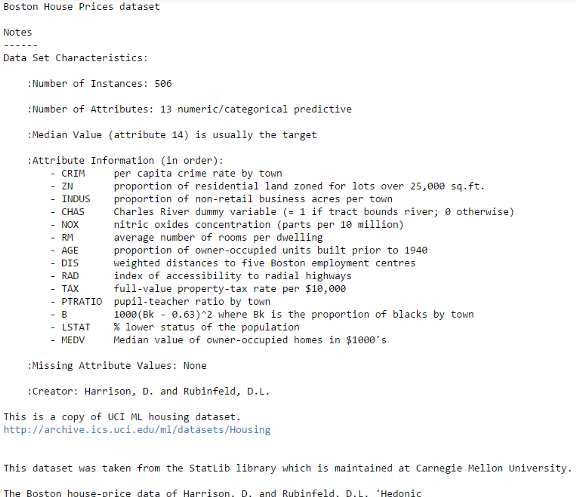

## Scale the dataset

In [32]:
scaler        = StandardScaler()
scaler.fit(data_df)
# transform
# fit_transform

# train, test
# fit (train)
# tranform(test), transform(train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [30]:
scaler        = StandardScaler()
# crim- mean(crim)/sd(crim)
# scaler.fit(data_df) # fit data
data_df_scale = scaler.fit_transform(data_df) # scale data

In [31]:
pd.DataFrame(data_df_scale).head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,0.159686
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,-0.101524
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,1.324247
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,1.182758
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,1.487503
5,-0.417044,-0.487722,-1.306878,-0.272599,-0.835284,0.207096,-0.351157,1.077737,-0.752922,-1.106115,0.113032,0.410571,-1.043322,0.671222
6,-0.410243,0.048772,-0.476654,-0.272599,-0.265154,-0.388411,-0.070229,0.839244,-0.523001,-0.577519,-1.505237,0.426798,-0.031268,0.039964
7,-0.403696,0.048772,-0.476654,-0.272599,-0.265154,-0.160466,0.978808,1.024638,-0.523001,-0.577519,-1.505237,0.441052,0.910700,0.497082
8,-0.395935,0.048772,-0.476654,-0.272599,-0.265154,-0.931206,1.117494,1.087196,-0.523001,-0.577519,-1.505237,0.328448,2.421774,-0.656595
9,-0.400729,0.048772,-0.476654,-0.272599,-0.265154,-0.399808,0.616090,1.329635,-0.523001,-0.577519,-1.505237,0.329325,0.623344,-0.395385


## Method I

In [35]:
pca   = PCA()
df_pca = pca.fit_transform(X=data_df_scale)

# Store as dataframe and print
df_pca = pd.DataFrame(df_pca)
print(df_pca.shape) 

(506, 14)


### Weights of Principal Components

In [38]:
# Principal Components Weights (Eigenvectors)
df_pca_loadings = pd.DataFrame(pca.components_)
df_pca_loadings.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.242284,-0.245435,0.331860,-0.005027,0.325194,-0.202817,0.296977,-0.298170,0.303413,0.324033,0.207680,-0.196638,0.311398,-0.266636
1,-0.065873,-0.148003,0.127076,0.410669,0.254276,0.434006,0.260303,-0.359150,0.031150,0.008851,-0.314623,0.026481,-0.201245,0.444924
2,0.395077,0.394546,-0.066082,-0.125305,-0.046476,0.353406,-0.200823,0.157069,0.418510,0.343232,0.000399,-0.361376,-0.161060,0.163189
3,0.100366,0.342958,-0.009627,0.700406,0.053708,-0.293357,-0.078426,0.184748,-0.051374,-0.026811,-0.342036,-0.201741,0.242621,-0.180298
4,-0.004958,-0.114495,0.022584,0.535198,-0.194606,0.008320,-0.149750,0.106219,0.230352,0.163426,0.615707,0.367461,-0.178359,0.050660


In [ ]:
#Percentage of Variance Explained with each PC

In [40]:
print(pca.explained_variance_ratio_[:10])

[0.46757068 0.11782371 0.09635042 0.06332428 0.06077853 0.04714363
 0.03824363 0.02879118 0.01980454 0.01801839]


In [17]:
df_orig = pca.inverse_transform(df_pca)
pd.DataFrame(df_orig).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,0.159686
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,-0.101524
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,1.324247
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,1.182758
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,1.487503


## Method II

If you were like me, Eigenvalues and Eigenvectors are concepts you would have encountered in your matrix algebra class but paid little attention to. Well, Eigen Values and Eigen Vectors are at the core of PCA.

What is Eigen vector?

v is an eigenvector of matrix A if A(v) is a scalar multiple of v.

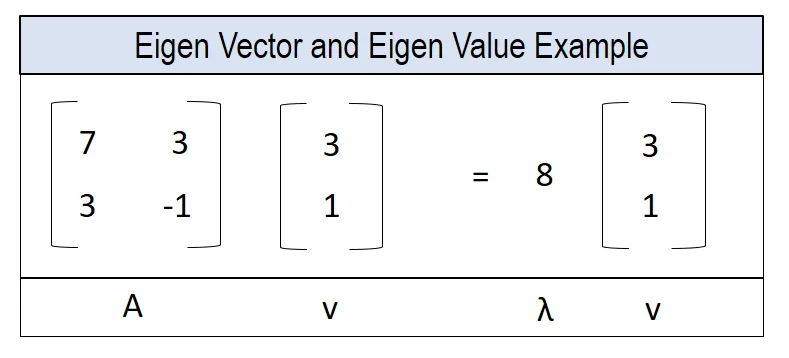

In [23]:
scale_df = pd.DataFrame(data_df_scale)
df_cov   = scale_df.cov()
df_cov.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.001980,-0.200866,0.407389,-0.056002,0.421805,-0.219681,0.353433,-0.380422,0.626744,0.583918,0.290520,-0.385826,0.456524,-0.389074
1,-0.200866,1.001980,-0.534885,-0.042781,-0.517627,0.312608,-0.570665,0.665724,-0.312566,-0.315186,-0.392454,0.175868,-0.413812,0.361159
2,0.407389,-0.534885,1.001980,0.063063,0.765164,-0.392451,0.646055,-0.709429,0.596308,0.722187,0.384006,-0.357683,0.604995,-0.484683
3,-0.056002,-0.042781,0.063063,1.001980,0.091383,0.091432,0.086689,-0.099372,-0.007383,-0.035657,-0.121756,0.048885,-0.054036,0.175607
4,0.421805,-0.517627,0.765164,0.091383,1.001980,-0.302787,0.732919,-0.770753,0.612651,0.669346,0.189307,-0.380803,0.592049,-0.428167


### Compute Eigen values and Eigen Vectors
Eigen values and Eigen vectors represent the amount of variance explained and how the columns are related to each other. The length of Eigenvectors is one.

In [24]:
from numpy.linalg import eig
eigvalues, eigvectors = eig(df_cov)
print(eigvalues[:10])
print(eigvectors.shape)

[6.55895193 1.65279831 1.35157702 0.88829539 0.85258439 0.66131773
 0.53647102 0.40387475 0.06044612 0.13427506]
(14, 14)


In [26]:
X_pca = np.dot(scale_df, eigvectors)
df_pca_calc = pd.DataFrame(X_pca) 
df_pca_calc.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-2.087344,0.492853,-0.335991,-0.028088,1.012801,0.262092,0.327878,0.160216,-0.247931,0.494680,0.471148,0.205773,0.109629,-0.780066
1,-1.373382,-0.170924,-0.965964,-0.432406,0.254645,-0.303779,0.559110,-0.288650,0.113117,0.113057,0.195830,0.246239,-0.588701,-0.277543
2,-2.376553,0.914027,-0.090026,-1.123913,-0.032788,-0.508900,0.487534,0.082490,-0.051307,-0.357030,-0.054227,0.195005,-0.416418,0.028905
3,-2.837779,0.194870,0.060545,-1.065682,-0.460334,-0.714008,0.623329,0.239722,-0.089625,-0.577809,0.358620,0.155891,-0.134699,-0.244565
4,-2.772916,0.433299,0.064042,-1.129637,-0.382179,-0.655855,0.704497,-0.102626,-0.148311,-0.778435,0.408753,0.000421,-0.221562,0.007758


In [42]:
df_pca.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-2.087344,0.492853,-0.335991,-0.028088,-1.012801,-0.262092,0.327878,0.160216,-0.471148,-0.205773,-0.780066,-0.109629,-0.494680,0.247931
1,-1.373382,-0.170924,-0.965964,-0.432406,-0.254645,0.303779,0.559110,-0.288650,-0.195830,-0.246239,-0.277543,0.588701,-0.113057,-0.113117
2,-2.376553,0.914027,-0.090026,-1.123913,0.032788,0.508900,0.487534,0.082490,0.054227,-0.195005,0.028905,0.416418,0.357030,0.051307
3,-2.837779,0.194870,0.060545,-1.065682,0.460334,0.714008,0.623329,0.239722,-0.358620,-0.155891,-0.244565,0.134699,0.577809,0.089625
4,-2.772916,0.433299,0.064042,-1.129637,0.382179,0.655855,0.704497,-0.102626,-0.408753,-0.000421,0.007758,0.221562,0.778435,0.148311
5,-2.300919,-0.328680,-0.450377,-0.693744,0.300186,0.582847,0.648704,0.132603,-0.466095,0.110179,-0.483653,0.351499,0.433819,0.024188
6,-1.309466,-0.220849,-0.616582,0.505774,-0.989388,-0.502690,0.017373,0.280012,-0.596124,-0.172767,-0.040115,0.583472,0.136821,-0.066440
7,-0.929211,0.098327,-0.797257,0.534789,-1.264538,-0.658515,0.219284,-0.727175,-0.803644,0.232808,0.398004,1.029947,0.623875,0.043621
8,0.051822,-1.043435,-1.475550,1.359692,-1.654449,-0.757151,0.306939,-1.189143,-1.150220,0.106290,0.920467,0.842007,0.528067,0.008902
9,-0.908157,-0.551911,-0.818907,0.803825,-1.214845,-0.502477,0.105625,-0.476002,-0.846897,-0.338362,0.012171,1.003521,0.334752,-0.071476
